# Linear Models

- [Problem Definition](#problem-definition)
- [Target Function](#target-function)
- [Raw Data](#raw-data)
- [Preprocessing](#preprocessing)
- [Machine Learning](#machine-learning)
    - [Stochasic Gradient Descent](#stochastic-gradient-descent)
        - [`NumPy`](#sgd-numpy)
        - [`scikit-learn`](#sgd-sklearn)
        - [`TensorFlow`](#sgd-tf)
    - [Maximum Likelihood Estimator](#maximum-likelihood-estimator)
        - [`NumPy`](#mle-numpy)
        - [`scikit-learn`](#mle-sklearn)
        - [`TensorFlow`](#mle-tf)
- [Big Picture](#big-picture)

## Problem Definition

In [22]:
# scientific computing library
import numpy as np
# machine learning library
from sklearn.linear_model import LinearRegression
# deep learning framework
import tensorflow as tf

# visualization tools
import matplotlib.pyplot as plt
import seaborn as sns

# show plots without need of calling `.show()`
%matplotlib inline

# prettify plots
plt.rcParams['figure.figsize'] = [20.0, 5.0]
sns.set_palette(sns.color_palette("muted"))
sns.set_style("ticks")

## Helper Functions

In [28]:
def visualize(x, y=None, y_noise=None, y_hat=None):
    """Visualization helper function.
    
    Parameters
    ----------
    x: array-like
        x-axis values
    y: array-like
        y-axis target values
    y_noise: array-like
        y-axis observations
    y_hat: array-like
        y-axis model predictions
    """
    if y is not None:
        plt.plot(x, y, label='Target Function')
    if y_noise is not None:
        plt.plot(x, y_, 'o', label='Noisy Observations')
    if y_hat is not None:
        plt.plot(x, y_hat, '--o', label='Model Predictions')
    plt.legend();

## Target Function <a class="anchor" id="target-function"></a>

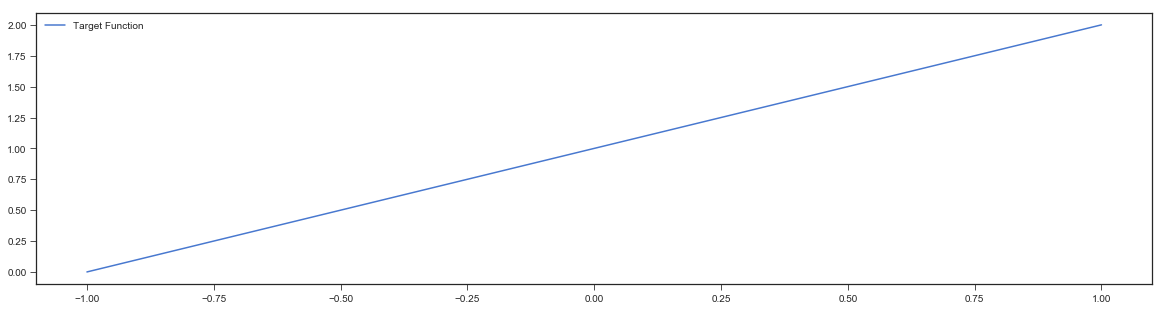

In [30]:
N = 5
np.random.seed(0)

x = np.linspace(-N/5, N/5, N)
y = 1.0 + x
visualize(x, y);

## Raw Data <a class="anchor" id="raw-data"></a>

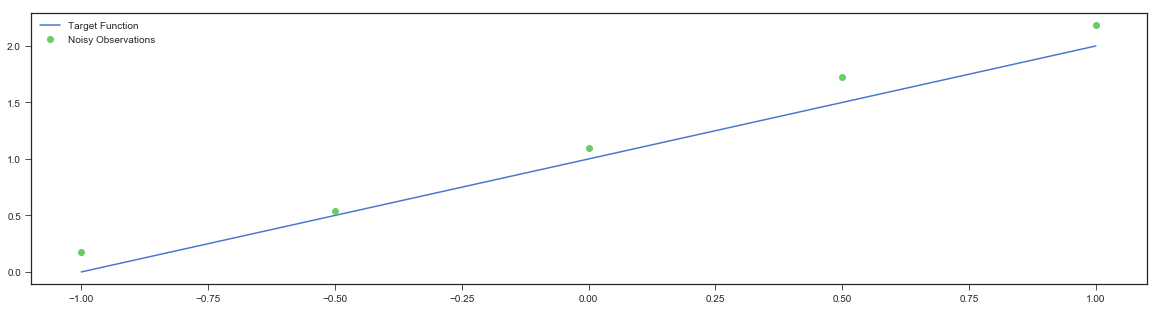

In [31]:
y_noise = y + np.random.normal(0,0.1, N)

visualize(x, y, y_noise)

## Preprocessing <a class="anchor" id="preprocessing"></a>

In [6]:
X = np.ones((N, 2))
X[:, 1 ] = x

## Machine Learning <a class="anchor" id="machine-learning"></a>

### Stochastic Gradient Descent <a class="anchor" id="stochastic-gradient-descent"></a>

$$
\begin{aligned}
    \hat{y} &= X*w \\
    \mathcal{L}(w) &= \frac{1}{2} \sum_{i=1}^{n}(y_{i} - f(x_{i} | w))^{2} \\
    \\
    w_{t+1} &= w_{t} - \eta \nabla \mathcal{L}(w) \\
\end{aligned}$$

#### `NumPy` <a class="anchor" id="sgd-numpy"></a>

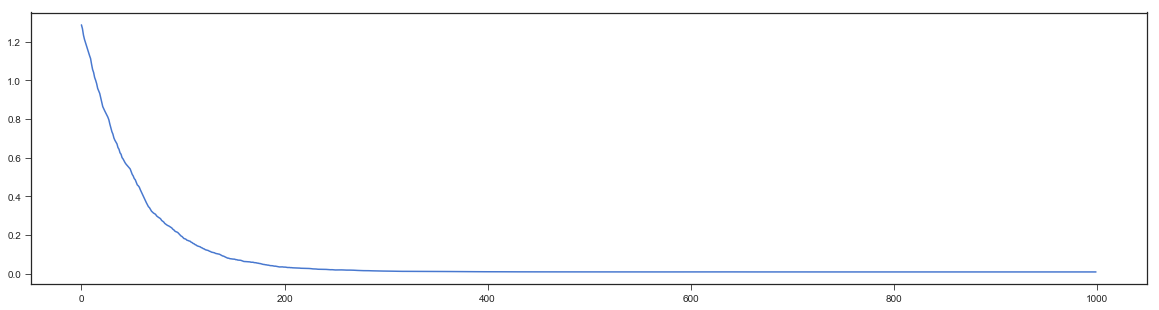

In [32]:
n_epochs = 1000
eta = 0.01
w = np.random.random(X.shape[1])

loss = []

for _ in range(n_epochs):
    y_hat = np.dot(X, w)
    l = 0.5 * np.sum((y_noise - y_hat)**2)
    i = np.random.randint(len(y_noise))
    error = y_hat[i] - y_noise[i]
    w = w - eta * error * X[i]
    loss.append(l)

plt.plot(loss);

#### `scikit-learn`  <a class="anchor" id="sgd-sklearn"></a>

#### `TensorFlow` <a class="anchor" id="sgd-tf"></a>

### Maximum Likelihood Estimator  <a class="anchor" id="maximum-likelihood-estimator"></a>

#### `NumPy` <a class="anchor" id="mle-numpy"></a>

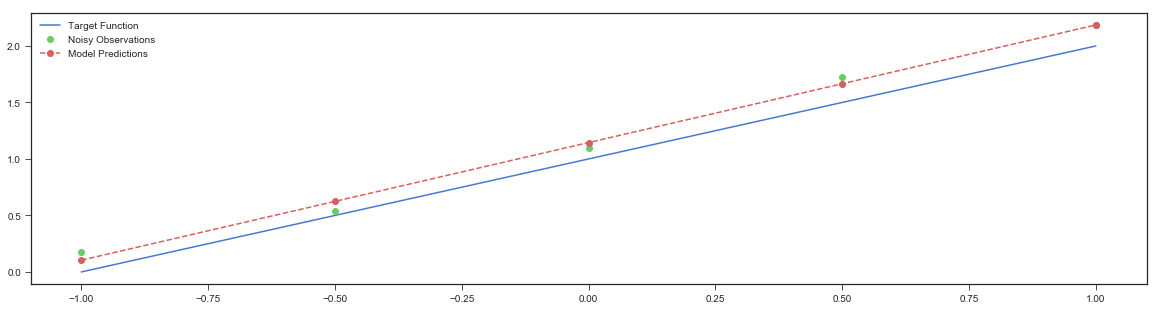

In [33]:
w = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y_noise)
y_hat = np.dot(X, w)

visualize(x, y, y_noise, y_hat)

#### `scikit-learn` <a class="anchor" id="mle-sklearn"></a>

#### `TensorFlow` <a class="anchor" id="mle-tf"></a>

## Big Picture